 Implement a KNN model to classify the animals in to categorie.


In [1]:
import  pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')


In [3]:
zoo=pd.read_csv("Zoo (1).csv")

In [4]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [6]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [7]:
zoo.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [8]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
zoo['animal name']=label_encoder.fit_transform(zoo['animal name'])

In [9]:
x = zoo.iloc[:,1:17].values
y=zoo.iloc[:,-1].values
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [10]:
x.shape,y.shape

((101, 16), (101,))

In [11]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.30 , random_state= 0)

In [12]:
KNN_classifier  = KNeighborsClassifier(n_neighbors = 5 , metric = "minkowski" , p = 2 )
KNN_classifier.fit(x_train , y_train)

KNeighborsClassifier()

In [13]:

y_pred = KNN_classifier.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix , accuracy_score

cm = confusion_matrix(y_pred , y_test)

In [15]:
accuracy_score(y_pred , y_test)

0.9354838709677419

In [16]:
KNN_classifier_1  = KNeighborsClassifier(n_neighbors = 13 , metric = "minkowski" , p = 2 )
KNN_classifier_1.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=13)

In [17]:
y_pred_1 = KNN_classifier_1.predict(x_test)
y_pred_1

array([1, 4, 4, 1, 1, 1, 2, 4, 1, 1, 6, 1, 2, 4, 4, 6, 1, 6, 2, 4, 2, 4,
       1, 2, 1, 1, 1, 2, 4, 4, 4], dtype=int64)

In [18]:
cm_1 = confusion_matrix(y_pred_1 , y_test)

In [19]:
accuracy_score(y_pred_1, y_test)

0.8387096774193549

In [20]:
kfold = KFold(n_splits=5)

In [21]:
model = KNeighborsClassifier(n_neighbors=13)
results = cross_val_score(model, x_train,y_train ,cv=kfold)
results.mean()

0.6571428571428571

In [22]:
n_neighbors1 = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors1)

In [23]:
model_1 =  KNeighborsClassifier()
grid = GridSearchCV(estimator= model_1,  param_grid=param_grid)
grid.fit(x , y )

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [24]:
print(grid.best_score_)


0.97


In [25]:
grid_y_pred = grid.predict(x)


In [26]:
grid_cm  = confusion_matrix (grid_y_pred , y)
grid_cm

array([[41,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0, 10]], dtype=int64)

In [27]:
accuracy_score(grid_y_pred , y)


1.0

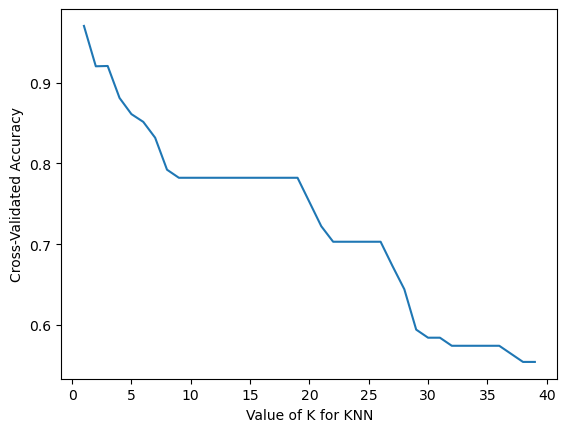

In [28]:
import matplotlib.pyplot as plt 

# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=4)
    k_scores.append(scores.mean())
    
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

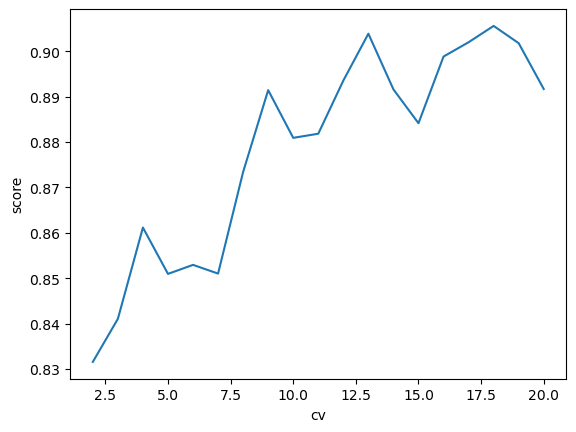

0.9055555555555556


In [29]:
# find best cv value :

%matplotlib inline

k_range = range(2,21)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = 5)
    scores = cross_val_score(knn, x, y, cv=k)
    k_score.append(scores.mean())
plt.plot(k_range, k_score)
plt.xlabel("cv")
plt.ylabel("score")
plt.show()
print(max(k_score))

In [30]:
error_rate=[]
for i in range(1,40):
    knn_model= KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    pred_i=knn_model.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test).round(2))
print(error_rate)

[0.03, 0.03, 0.06, 0.06, 0.06, 0.06, 0.1, 0.13, 0.13, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.39, 0.39, 0.39, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.48, 0.48, 0.48]


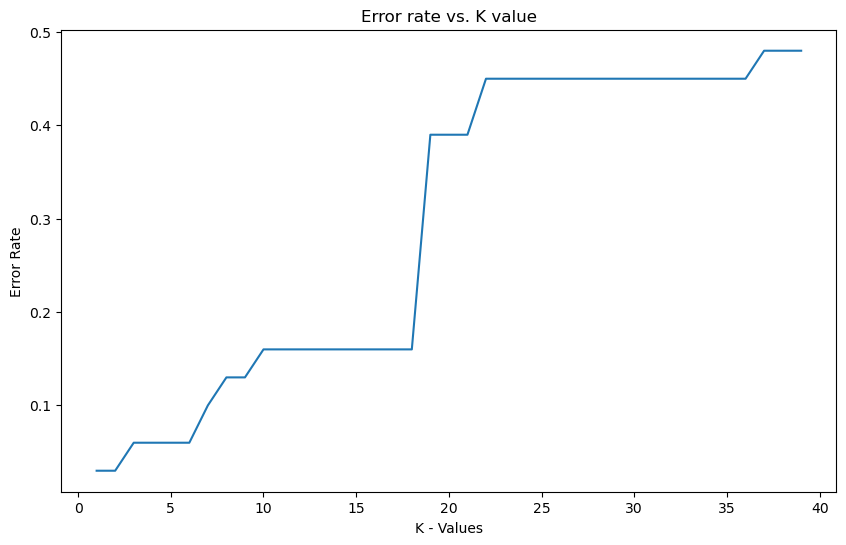

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.xlabel('K - Values')
plt.ylabel('Error Rate')
plt.title('Error rate vs. K value')
plt.show()


In [32]:
# Grid-Search without applying cross-validation :
from sklearn.model_selection import GridSearchCV

param_grid=dict(n_neighbors=range(1,40))
knn_models=KNeighborsClassifier()
grid= GridSearchCV(estimator=knn_models,param_grid=param_grid)
grid.fit(x,y)
print(grid.best_score_)
grid.best_params_

0.97


{'n_neighbors': 1}

In [33]:
model_2 = KNeighborsClassifier(n_neighbors= 3)
result = cross_val_score(model_2, x, y, cv=19)
print(result.mean())

0.9561403508771931


In [34]:
model_2.fit(x_train, y_train)
y_pred_1 = model_2.predict(x_test)
np.mean(y_pred_1 == y_test)

0.9354838709677419

In [35]:
model_3 = KNeighborsClassifier(n_neighbors= 7)
result_1 = cross_val_score(model_3, x, y, cv=19)
print(result_1.mean())

0.8614035087719298


In [36]:
model_3.fit(x_train, y_train)
y_pred_2 = model_3.predict(x_test)
np.mean(y_pred_2 == y_test)

0.9032258064516129

In [37]:
clf = GridSearchCV(estimator=knn_models, param_grid = param_grid)
clf.fit(x_train, y_train)
print(grid.best_score_)     
grid.best_params_

0.97


{'n_neighbors': 1}

In [38]:
pred = clf.predict(x_test)
pd.crosstab(y_test, pred)

col_0,1,2,3,4,5,6,7
row_0,,,,,,,
1,11,0,0,0,0,0,0
2,0,6,0,0,0,0,0
3,0,0,1,1,0,0,0
4,0,0,0,7,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,2,0
7,0,0,0,0,0,0,2
